In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('mass.csv')

df.columns = df.columns.str.replace(' ', '_').str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              93 non-null     object 
 1   weight_in_pounds  93 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              93 non-null     datetime64[ns]
 1   weight_in_pounds  93 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [8]:
mass_dates = df['date']
mass = df['weight_in_pounds']

mass_dates

0    2023-08-10
1    2023-08-11
2    2023-08-12
3    2023-08-13
4    2023-08-14
        ...    
88   2023-11-06
89   2023-11-07
90   2023-11-08
91   2023-11-09
92   2023-11-10
Name: date, Length: 93, dtype: datetime64[ns]

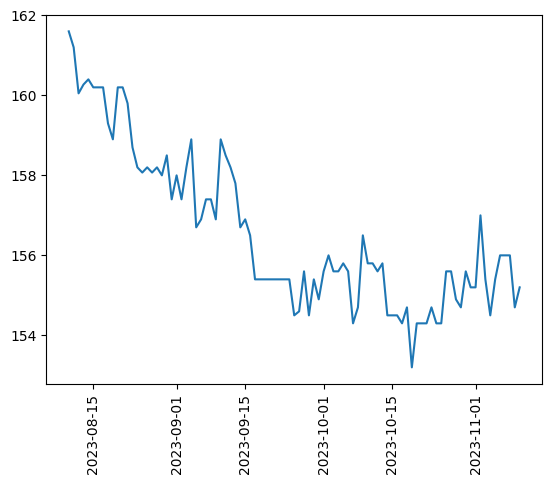

In [9]:
plt.plot(mass_dates, mass)
plt.xticks(rotation=90);

In [10]:
target_min = 110
target_max = 132
target_avg = np.average([target_max, target_min])

In [11]:
lr_dates = mass_dates.apply(lambda x: x.toordinal()).values.reshape(-1, 1)

lr = LinearRegression()

lr.fit(lr_dates, mass)

best_fit = lr.predict(lr_dates)

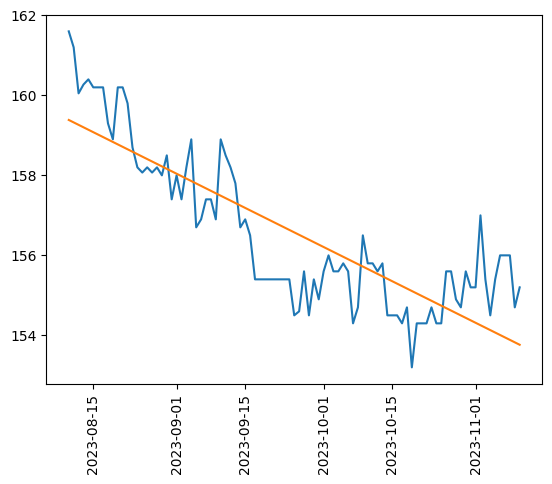

In [12]:
plt.plot(mass_dates, mass)
plt.plot(mass_dates, best_fit)
plt.xticks(rotation=90);

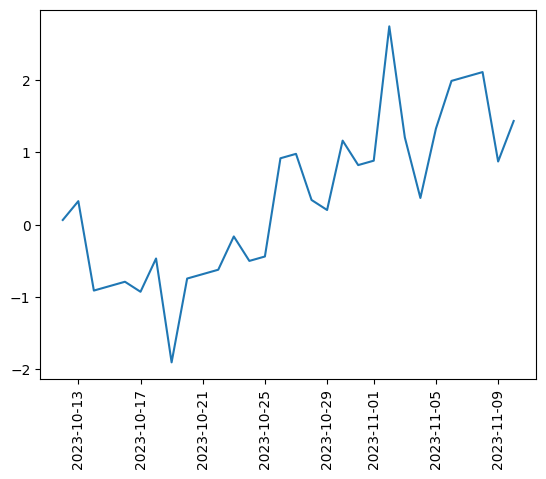

In [13]:
mass_diff = mass - best_fit

diff_dates = mass_dates[-30:]
mass_diff = mass_diff[-30:]

plt.plot(diff_dates, mass_diff)
plt.xticks(rotation=90);

In [14]:
mass_std = mass_diff.std()
mass_2std = mass_std * 2
mass_3std = mass_std * 3

In [15]:
prediction_window = int(len(mass_dates) * 0.3)
prediction_window

27

In [16]:
last_date = (np.max(mass_dates) + timedelta(days=1))
next_date = last_date
next_lr_date = [[next_date.toordinal()]]

mass_list = list(best_fit)
date_list = list(mass_dates)

[next_mass] = lr.predict(next_lr_date)

mass_list.append(next_mass)
date_list.append(next_date)

while next_mass > target_avg and next_date < (last_date + timedelta(days=prediction_window)):
    next_date += timedelta(days=1)
    next_lr_date = [[next_date.toordinal()]]
    [next_mass] = lr.predict(next_lr_date)
    mass_list.append(next_mass)
    date_list.append(next_date)

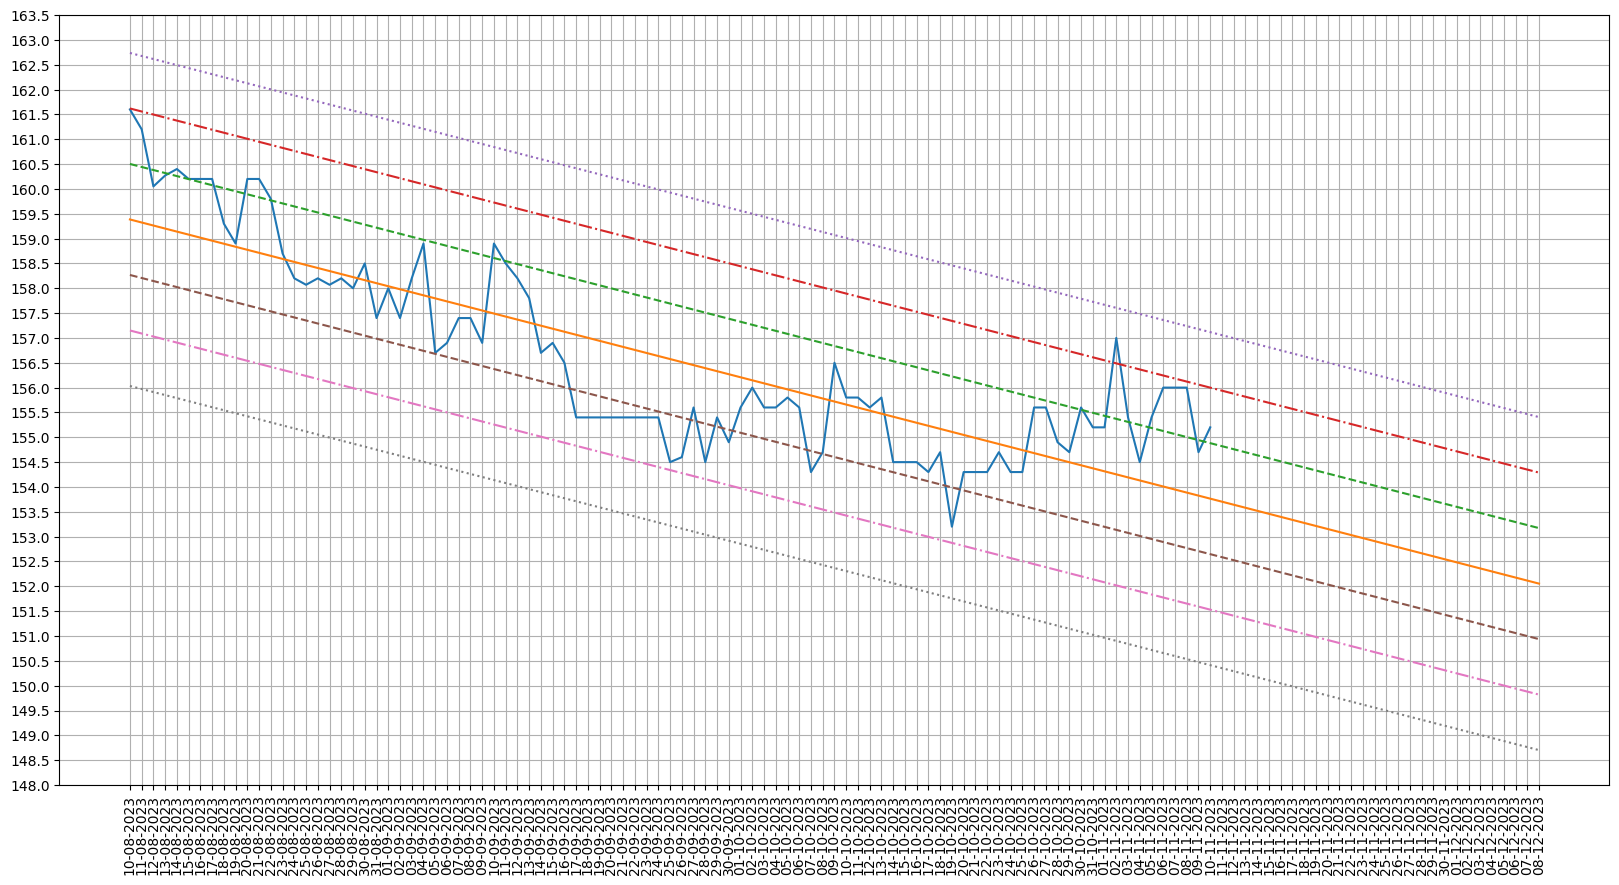

In [17]:
min_date = np.min(date_list)
max_date = np.max(date_list)

date_range = pd.date_range(start=min_date, end=max_date, freq='MS')
format_date = [date.strftime('%m-%Y') for date in date_range]

plus_std = mass_list + mass_std
plus_2std = mass_list + mass_2std
plus_3std = mass_list + mass_3std
minus_std = mass_list - mass_std
minus_2std = mass_list - mass_2std
minus_3std = mass_list - mass_3std

y_ticks = list(np.arange(int(np.min(minus_3std)), int(np.max(plus_3std)) + 2, 0.5))

date_range = pd.date_range(start=min_date, end=max_date, freq='D')
format_date = [date.strftime('%d-%m-%Y') for date in date_range]

plt.figure(figsize=(20, 10))
plt.plot(date_list[:-(prediction_window + 1)], mass)
plt.plot(date_list, mass_list)
plt.plot(date_list, plus_std, linestyle='--')
plt.plot(date_list, plus_2std, linestyle='-.')
plt.plot(date_list, plus_3std, linestyle=':')
plt.plot(date_list, minus_std, linestyle='--')
plt.plot(date_list, minus_2std, linestyle='-.')
plt.plot(date_list, minus_3std, linestyle=':')
plt.yticks(y_ticks)
plt.xticks(date_range, labels=format_date, rotation=90)
plt.grid(True);

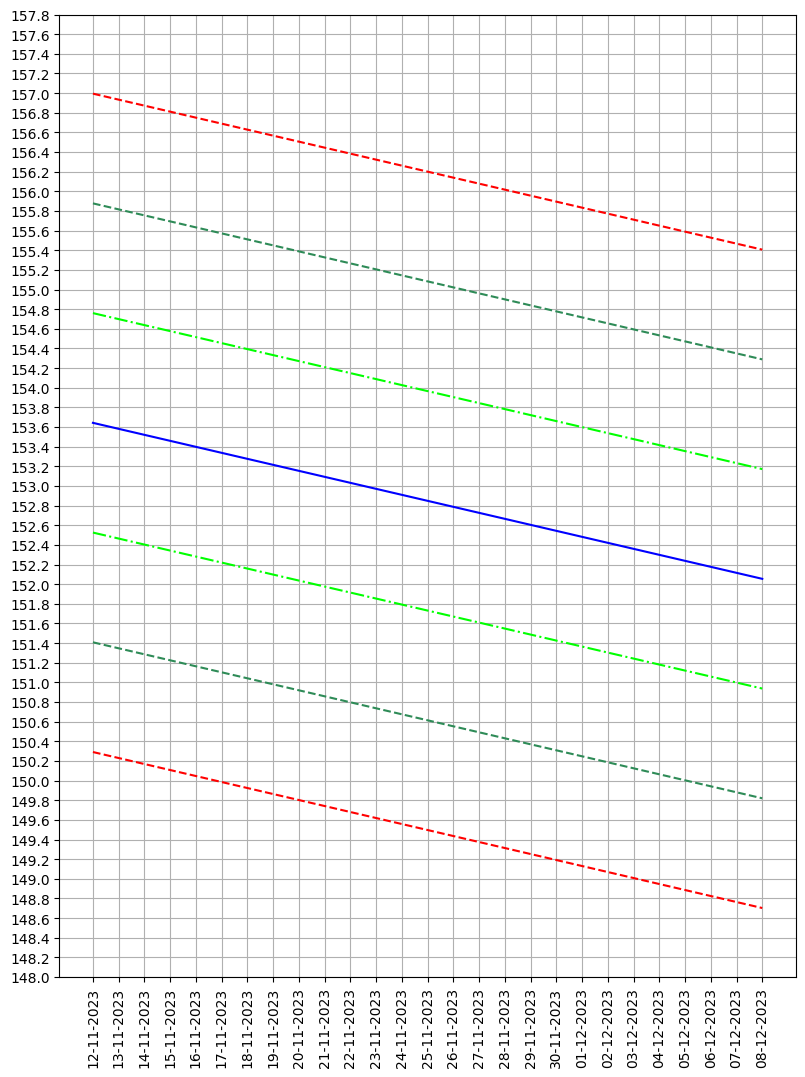

In [20]:
min_date = np.min(date_list) - timedelta(days=30)
max_date = np.max(date_list)

y_ticks = list(np.arange(int(np.min(minus_3std)), int(np.max(plus_3std[-prediction_window:])) + 2, 0.2))

date_range = pd.date_range(start=min_date, end=max_date, freq='D')
format_date = [date.strftime('%d-%m-%Y') for date in date_range]

start_date = format(date_list[-prediction_window], '%d_%m_%Y')
end_date = format(date_list[-1], '%d_%m_%Y')

start_date = str(start_date)
end_date = str(end_date)

plt.figure(figsize=(9.5, 12.5))
plt.plot(date_list[-prediction_window:], mass_list[-prediction_window:], color='blue')
plt.plot(date_list[-prediction_window:], plus_std[-prediction_window:], linestyle='-.', color='lime')
plt.plot(date_list[-prediction_window:], plus_2std[-prediction_window:], linestyle='--', color='seagreen')
plt.plot(date_list[-prediction_window:], plus_3std[-prediction_window:], linestyle='--', color='red')
plt.plot(date_list[-prediction_window:], minus_std[-prediction_window:], linestyle='-.', color='lime')
plt.plot(date_list[-prediction_window:], minus_2std[-prediction_window:], linestyle='--', color='seagreen')
plt.plot(date_list[-prediction_window:], minus_3std[-prediction_window:], linestyle='--', color='red')
plt.yticks(y_ticks)
plt.xticks(date_range[-prediction_window:], labels=format_date[-prediction_window:], rotation=90)
plt.grid(True)
plt.savefig(f'{start_date}_{end_date}_SPC_Chart');

In [ ]:
max_limit = int(np.max(plus_3std))

while next_mass > target_max and next_mass < (max_limit + 2):
    next_date += timedelta(days=1)
    next_lr_date = [[next_date.toordinal()]]
    [next_mass] = lr.predict(next_lr_date)

if next_mass < target_max + 1
    print(next_date)
else:
    print(f'Weight is not being lost.')

2024-11-01 00:00:00
